In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spanish-natality/natalidad.geojson
/kaggle/input/lifeexpspain/life_expectancy_spain.csv


In [2]:
life_data = pd.read_csv('../input/lifeexpspain/life_expectancy_spain.csv')
life_data.sort_values(by = ['PROVINCIA'])
life_data.drop(life_data.loc[life_data['PROVINCIA']== 'Ceuta'].index, inplace = True)
life_data.drop(life_data.loc[life_data['PROVINCIA']== 'Melilla'].index, inplace = True)
life_data.drop(life_data.loc[life_data['PROVINCIA']== 'Álava'].index, inplace = True)
life_data.drop(life_data.loc[life_data['PROVINCIA']== 'Ávila'].index, inplace = True)
life_data.drop(life_data.loc[life_data['PROVINCIA']== 'A Coruña'].index, inplace = True)


new_row1 = {'PROVINCIA':'Alava', 'EDAD': 84}
life_data = life_data.append(new_row1, ignore_index = True)
new_row2 = {'PROVINCIA':'Avila', 'EDAD': 84}
life_data = life_data.append(new_row2, ignore_index = True)
life_data['PROVINCIA'][0] = 'A Coruña'


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<AxesSubplot:title={'center':'LIFE EXPECTANCY SPAIN 2021'}, xlabel='Longitud', ylabel='Latitud'>

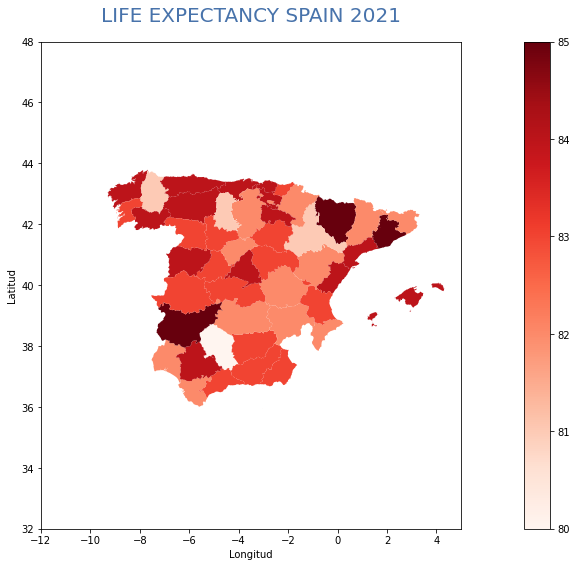

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar la capa temática
natalidad = "../input/spanish-natality/natalidad.geojson"
map_data = gpd.read_file(natalidad)

map_data['EDAD'] = life_data['EDAD']

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('LIFE EXPECTANCY SPAIN 2021', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='EDAD', cmap='Reds', ax=ax,
              legend=True, cax=cax, zorder=5)


In [4]:
del map_data['NAME_1']
del map_data['CC_2']
map_data_sorted = map_data.sort_values(by = ['NAME_2'])
map_data_sorted



,NAME_2,NAT2018,geometry,EDAD
37,A Coruña,6.36,"MULTIPOLYGON (((-9.01514 42.48764, -9.01514 42...",84.0
12,Albacete,7.75,"MULTIPOLYGON (((-2.76198 38.53278, -2.76382 38...",82.0
32,Alicante,7.63,"MULTIPOLYGON (((-0.45708 38.16208, -0.45708 38...",82.0
0,Almería,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",83.0
48,Asturias,5.60,"MULTIPOLYGON (((-6.03181 43.59125, -6.03181 43...",84.0
35,Badajoz,7.73,"MULTIPOLYGON (((-7.04542 38.18510, -7.04546 38...",85.0
41,Baleares,8.71,"MULTIPOLYGON (((1.42514 38.77681, 1.42514 38.7...",84.0
26,Barcelona,8.15,"MULTIPOLYGON (((2.17292 41.33958, 2.17292 41.3...",85.0
18,Burgos,6.62,"MULTIPOLYGON (((-4.24498 42.73595, -4.25125 42...",82.0
11,Cantabria,6.55,"MULTIPOLYGON (((-3.90653 43.47792, -3.90653 43...",84.0
